In [2]:
import pandas as pd

raw_data = pd.read_csv("/Users/annaevseeva/Downloads/MARL Dynare/McCandless_2008_Chapter_13.csv")
raw_data.head()

,w,r,c,k,h,m,p,pstar,g,lambda,b,rf,e,x,AUX_ENDO_LEAD_23,AUX_ENDO_LEAD_45
0,2.356211,0.034285,0.897527,12.257799,0.317420,0.916596,1.020964,0.995810,1.007638,0.987752,1.985663,0.010060,1.025154,-0.024420,1.110604,1.098932
1,2.364192,0.034627,0.895929,12.249591,0.319177,0.928450,1.035750,1.001429,1.013031,0.993410,1.990462,0.010124,1.034322,-0.015148,1.100682,1.097315
2,2.352575,0.034378,0.892402,12.235822,0.318251,0.939324,1.051583,1.003196,1.011954,0.987719,1.995404,0.010110,1.048386,-0.015145,1.104195,1.099404
3,2.345800,0.034552,0.893336,12.220910,0.320413,0.946478,1.058421,1.009558,1.007865,0.987674,2.005378,0.010136,1.048862,-0.010006,1.100327,1.102114
4,2.341615,0.034621,0.893052,12.205264,0.321224,0.952241,1.065067,1.013809,1.006335,0.987251,2.017707,0.010098,1.051258,-0.007721,1.097624,1.103730


In [3]:
print(raw_data.columns.to_list())

['w', 'r', 'c', 'k', 'h', 'm', 'p', 'pstar', 'g', 'lambda', 'b', 'rf', 'e', 'x', 'AUX_ENDO_LEAD_23', 'AUX_ENDO_LEAD_45']


In [4]:
column_mapping = {
    "w": "Real Wage",
    "r": "Real Return On Capital",
    "c": "Real Consumption",
    "k": "Capital Stock",
    "h": "Hours Worked",
    "m": "Money Stock",
    "p": "Price Level",
    "pstar": "Foreign Price Level",
    "g": "Growth Rate Of Money Stock",
    "lambda": "Total Factor Productivity",
    "b": "Foreign Bonds",
    "rf": "Foreign Interest Rate",
    "e": "Exchange Rate",
    "x": "Net Exports",
    "AUX_ENDO_LEAD_23": "AUX_ENDO_LEAD_23",
    "AUX_ENDO_LEAD_45": "AUX_ENDO_LEAD_45"
}

# Предположим, что df — это ваш датафрейм
raw_data = raw_data.rename(columns=column_mapping)

# Вывод обновленного датафрейма
print(raw_data.head())
idx = raw_data.columns.get_loc('Real Consumption')
print(idx)

   Real Wage  Real Return On Capital  Real Consumption  Capital Stock  \
0   2.356211                0.034285          0.897527      12.257799   
1   2.364192                0.034627          0.895929      12.249591   
2   2.352575                0.034378          0.892402      12.235822   
3   2.345800                0.034552          0.893336      12.220910   
4   2.341615                0.034621          0.893052      12.205264   

   Hours Worked  Money Stock  Price Level  Foreign Price Level  \
0      0.317420     0.916596     1.020964             0.995810   
1      0.319177     0.928450     1.035750             1.001429   
2      0.318251     0.939324     1.051583             1.003196   
3      0.320413     0.946478     1.058421             1.009558   
4      0.321224     0.952241     1.065067             1.013809   

   Growth Rate Of Money Stock  Total Factor Productivity  Foreign Bonds  \
0                    1.007638                   0.987752       1.985663   
1             

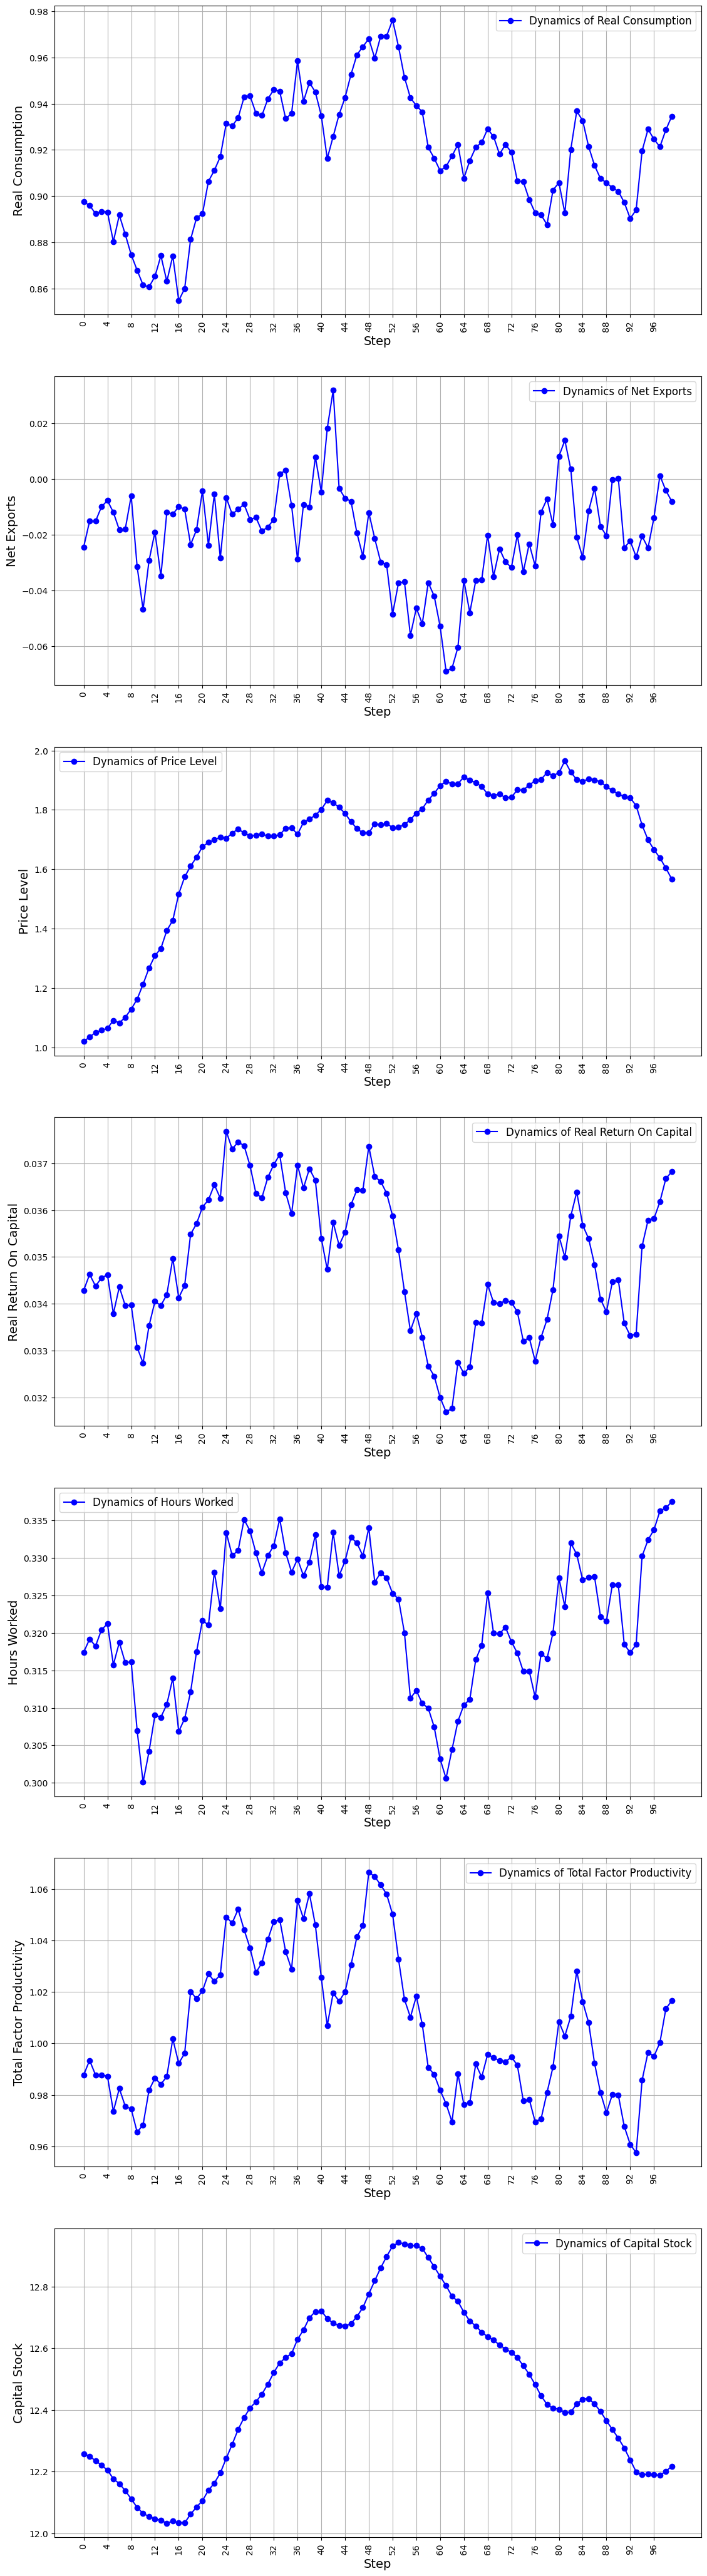

In [6]:
import matplotlib.pyplot as plt
import numpy as np

columns = ["Real Consumption", "Net Exports", "Price Level", "Real Return On Capital", "Hours Worked", "Total Factor Productivity", "Capital Stock"]
# columns = ["y", "c", "k", "invest"]


fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(13.33, 7.5 * len(columns)))

for idx, column in enumerate(columns):
    
    column_values = raw_data[column].to_numpy()
    
    steps = np.arange(len(column_values))
    
    ax = axes[idx]
    
    ax.plot(steps, column_values, marker='o', color='blue', label=f"Dynamics of {column}")
    
    
    ax.legend(fontsize=12)
    ax.set_xlabel("Step", fontsize=14)
    ax.set_ylabel(f"{column}", fontsize=14)
    ax.set_xticks(steps[::4])
    # ax.set_yticks(np.arange(np.min(column_values), np.max(column_values)))
    ax.set_xticklabels(ax.get_xticks(), rotation=90)
    ax.grid(True)